## Exploratory Data Analysis 
The point of this project is to cover statistical principles supporting the data analytics life cycle. I compute and interpret measures of central tendency, correlations, and variation. I introduce hypothesis testing, focusing on application for parametric tests, and addresses communication skills and tools to explain an analyst’s findings to others within an organization.

## Competencies 
__Data Interpretation__ <br>
Interprets central tendency, correlations, and variation to inform organizational decisions.

__Conduct Parametric Testing__ <br>
Conducts parametric hypothesis testing.

## Write Up 
__Research Question__ <br>
Does the complication risk influence patient re-admission? <br>

__Benefit of Analysis__<br>
Readmission of patients is an important issue to assess due to the penalties that come with excessive readmissions. Stakeholders will benefit from this analysis by focusing on the relationship between the complication risk of patients and the risk of readmission. If found significant, we can then focus on the care provided to those with higher complication risks to prevent readmission in the future. If not found significant, we can eliminate this potential cause for readmission and readjust our focus to other factors. 

## Code

In [1]:
# Import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Import medical CSV file 
medical_data = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_clean.csv")

In [3]:
# Looking at medical data information 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
medical_data_cat = medical_data[['ReAdmis','Complication_risk']]

In [5]:
medical_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ReAdmis            10000 non-null  object
 1   Complication_risk  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
# Creating contingency table 
med_cont = pd.crosstab(medical_data_cat.ReAdmis, medical_data_cat.Complication_risk, margins=True)
print(med_cont)

Complication_risk  High   Low  Medium    All
ReAdmis                                     
No                 2135  1343    2853   6331
Yes                1223   782    1664   3669
All                3358  2125    4517  10000


In [7]:
# Looking at Chi-square test
stats.chi2_contingency(observed = med_cont)

Chi2ContingencyResult(statistic=0.15902193516217972, pvalue=0.9999210625319999, dof=6, expected_freq=array([[ 2125.9498,  1345.3375,  2859.7127,  6331.    ],
       [ 1232.0502,   779.6625,  1657.2873,  3669.    ],
       [ 3358.    ,  2125.    ,  4517.    , 10000.    ]]))

In [8]:
# Interpreting the results 
pvalue=0.9999210625319999
alpha = 0.05
if pvalue < alpha:
    print("There is a significant association between variables.")
else: 
    print("There is no significant association between variables.") 

There is no significant association between variables.


## Univariate Statistics
Two continuous variables: Age and Income<br>
Two categorical variables: Initial admin and Complication risk 

In [9]:
# Univariate Statistics 
# Continuous variables - Age
medical_data['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Univariate Statistics - Age Distribution')

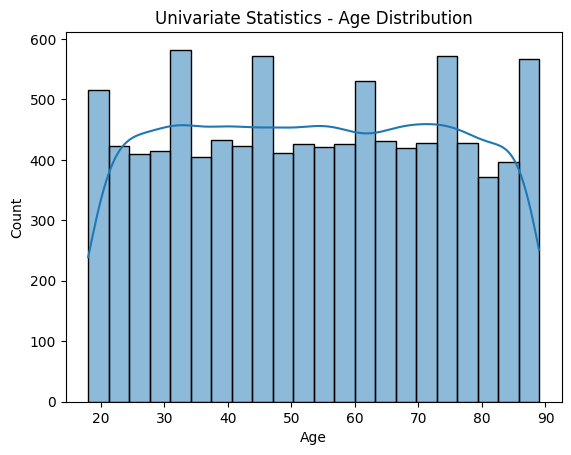

In [10]:
#Age - Histogram
sns.histplot(medical_data.Age,kde=True) 
plt.title("Univariate Statistics - Age Distribution")

In [11]:
# Continuous variables - Income
medical_data['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Univariate Statistics - Income Distribution')

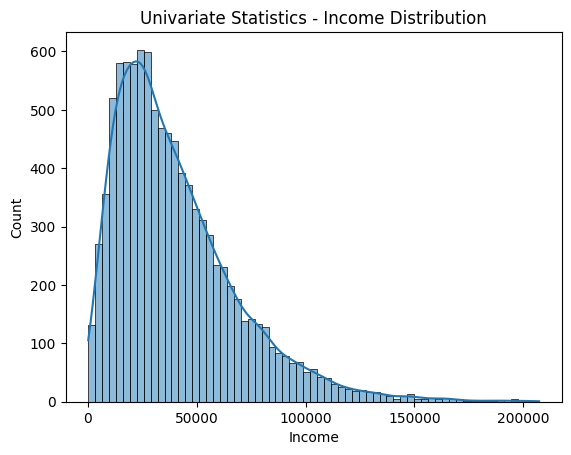

In [12]:
#Income - Histogram
sns.histplot(medical_data.Income,kde=True) 
plt.title("Univariate Statistics - Income Distribution")

In [13]:
# Categorical - Initial_admin
medical_data['Initial_admin'].describe()

count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: Initial_admin, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Initial Admission Distribution')

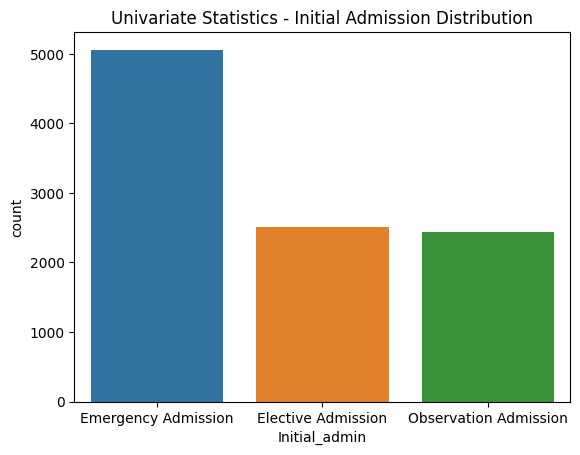

In [14]:
sns.countplot(data=medical_data, x='Initial_admin')
plt.title("Univariate Statistics - Initial Admission Distribution")

In [15]:
medical_data['Complication_risk'].describe()

count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Complication Risk Distribution')

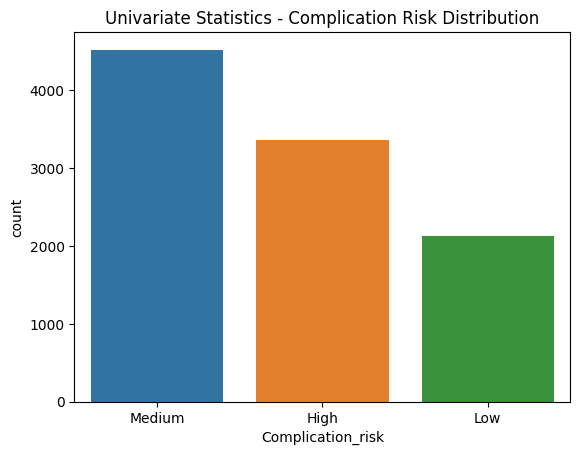

In [16]:
sns.countplot(data=medical_data, x='Complication_risk')
plt.title("Univariate Statistics - Complication Risk Distribution")

## Bivariate Statistics

In [17]:
# Bivariate Statistics 
# Continuous vs Continuous - TotalCharge vs Initial_days (stats)
medical_data[['TotalCharge', 'Initial_days']].describe()

,TotalCharge,Initial_days
count,10000.000000,10000.000000
mean,5312.172769,34.455299
std,2180.393838,26.309341
min,1938.312067,1.001981
25%,3179.374015,7.896215
50%,5213.952000,35.836244
75%,7459.699750,61.161020
max,9180.728000,71.981490


In [18]:
# Continuous vs Continuous - TotalCharge vs Initial_days (stats)
medical_data[['TotalCharge', 'Initial_days']].corr()

,TotalCharge,Initial_days
TotalCharge,1.00000,0.98764
Initial_days,0.98764,1.00000


Text(0.5, 1.0, 'Bivariate Statistics - Total Charge vs Inital Days Distribution')

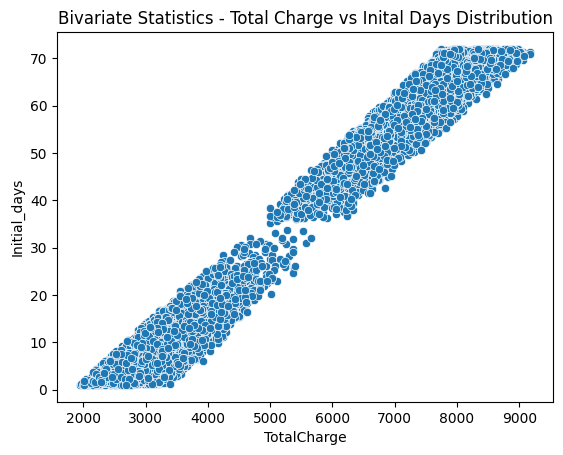

In [19]:
# Continuous vs Continuous - TotalCharge vs Initial_days (plot)
sns.scatterplot(data=medical_data, x='TotalCharge', y='Initial_days')
plt.title("Bivariate Statistics - Total Charge vs Inital Days Distribution")

In [20]:
# Categorical - Bivariate Statistics (Overweight and ReAdmis - values)
pd.crosstab(medical_data.ReAdmis, medical_data.Overweight, margins=True)

Overweight,No,Yes,All
ReAdmis,,,
No,1821,4510,6331
Yes,1085,2584,3669
All,2906,7094,10000


Text(0.5, 1.0, 'Bivariate Statistics - Overweight vs ReAdmis Distribution')

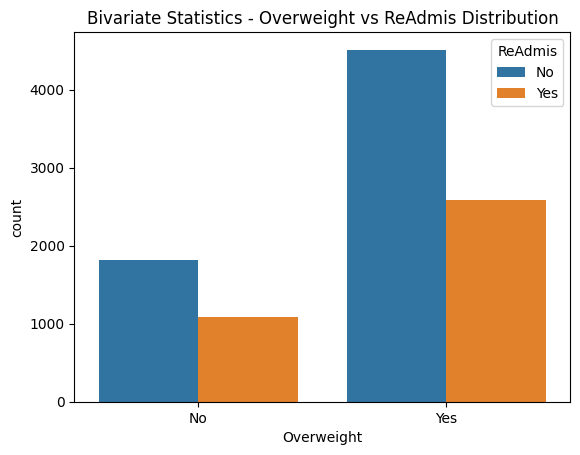

In [21]:
# Categorical vs Categorical - Bivariate Statistics (Overweight and ReAdmis - plot)
sns.countplot(data=medical_data,x='Overweight', hue='ReAdmis')
plt.title("Bivariate Statistics - Overweight vs ReAdmis Distribution")

## Analysis
The results of the Chi-square test indicate that there is no relationship between readmission and complication risk. The p value was approximately 0.99 which is significantly higher than the alpha 0.05. This means that we fail to reject the null hypothesis which was that there was no relationship between the two variables. Although our Chi-square test was unsuccessful, the bivariate analysis was successful in showing a significant correlation between the total amount charged and the initial days variable.  

## Recommended Course of Action 
Based on the results, the focus needs to be shifted to other variables. Complication risk does not influence readmission significantly, so they need to continue looking at other variables. A comparison of readmissions and a quantitative variable like doctor visits or vitamin D levels would be beneficial. Also, I would recommend looking at all the health categorical variables like high blood pressure, for example, and see if there is a common readmission trend. 